In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
raw_data = pd.read_csv("cars-info.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe()


,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no = data.dropna(axis=0)

In [7]:
data_no.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [8]:
data_no.isnull().sum()


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

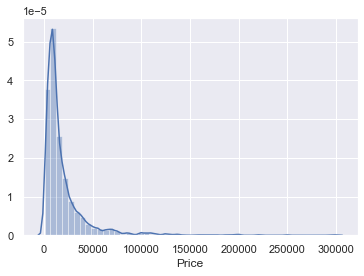

In [9]:
sn.distplot(data_no["Price"])

### Dealing with outliers

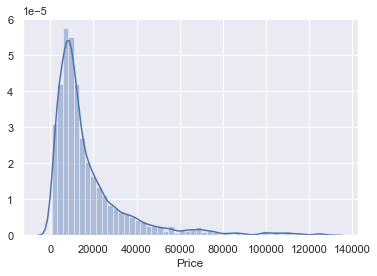

In [10]:
q = data_no["Price"].quantile(0.99)
data_1 = data_no[data_no["Price"]<q]
sn.distplot(data_1["Price"])

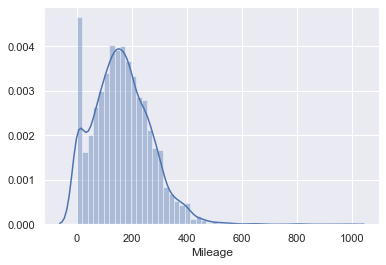

In [11]:
sn.distplot(data_no["Mileage"])

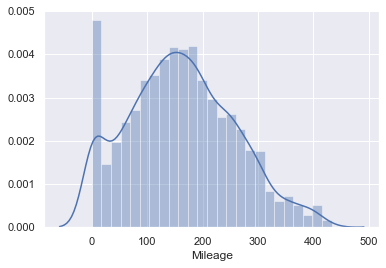

In [12]:
q = data_no["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]
sn.distplot(data_2["Mileage"])

In [13]:
data_2.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


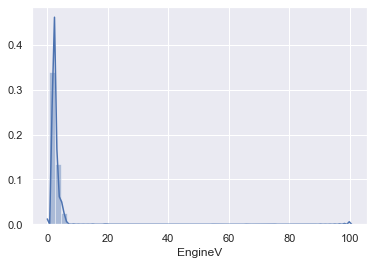

In [14]:
sn.distplot(data_no["EngineV"])

In [15]:
data_3 = data_2[data_2["EngineV"]<6.5]

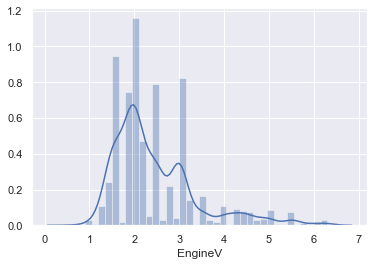

In [16]:
sn.distplot(data_3["EngineV"])

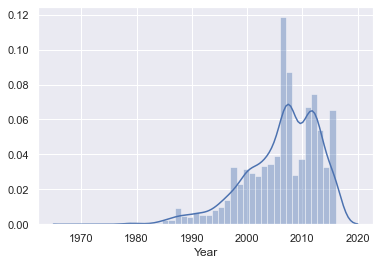

In [17]:
sn.distplot(data_no["Year"])

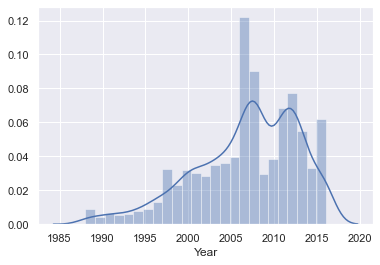

In [18]:
q = data_no["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]
sn.distplot(data_4["Year"])

In [19]:
clean_data = data_4.reset_index(drop=True)



In [20]:
clean_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [21]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
# ax1.scatter(clean_data['Year'],clean_data['Price'])
# ax1.set_title('Price and Year')
# ax2.scatter(clean_data['EngineV'],clean_data['Price'])
# ax2.set_title('Price and EngineV')
# ax3.scatter(clean_data['Mileage'],clean_data['Price'])
# ax3.set_title('Price and Mileage')
# 
# 
# plt.show()

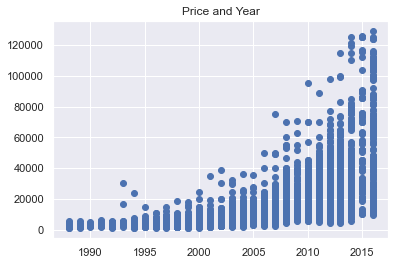

In [22]:
plt.scatter(clean_data['Year'],clean_data['Price'])
plt.title('Price and Year')
plt.show()


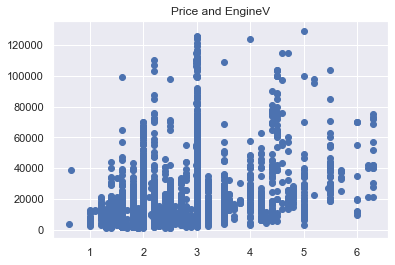

In [23]:
plt.scatter(clean_data['EngineV'],clean_data['Price'])
plt.title('Price and EngineV')
plt.show()

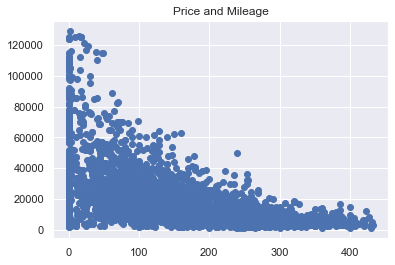

In [24]:
plt.scatter(clean_data['Mileage'],clean_data['Price'])
plt.title('Price and Mileage')
plt.show()

In [25]:
clean_data["LogPrice"] = np.log(clean_data["Price"])
clean_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,LogPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


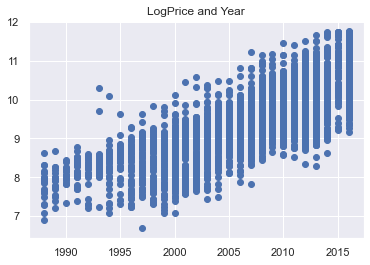

In [26]:
plt.scatter(clean_data['Year'],clean_data['LogPrice'])
plt.title('LogPrice and Year')
plt.show()


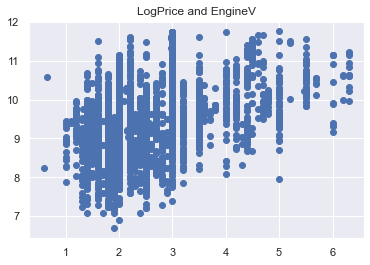

In [27]:
plt.scatter(clean_data['EngineV'],clean_data['LogPrice'])
plt.title('LogPrice and EngineV')
plt.show()

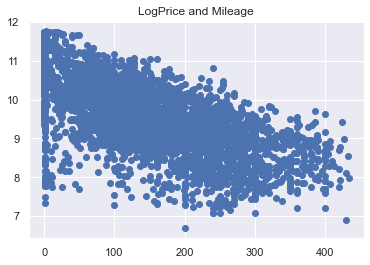

In [28]:
plt.scatter(clean_data['Mileage'],clean_data['LogPrice'])
plt.title('LogPrice and Mileage')
plt.show()

In [29]:
clean_data = clean_data.drop(["Price"],axis=1)

In [30]:
clean_data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'LogPrice'], dtype=object)

In [31]:
variables = clean_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif


,VIF,Features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [32]:
data_no_multicollinearity = clean_data.drop(['Year'],axis=1)


In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [34]:
data_with_dummies.head()

,Mileage,EngineV,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [35]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'LogPrice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
cols = ['LogPrice', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
preprocessed_data = data_with_dummies[cols]
preprocessed_data.head()

,LogPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [38]:
preprocessed_data.describe()


,LogPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000
mean,9.415868,160.471547,2.450246,0.161407,0.195034,0.078117,0.111743,0.128815,0.219348,0.065442,0.095706,0.379203,0.096223,0.157786,0.146922,0.025608,0.360062,0.906363
std,0.876669,95.543697,0.949413,0.367954,0.396278,0.268390,0.315091,0.335039,0.413858,0.247337,0.294226,0.485252,0.294936,0.364587,0.354074,0.157983,0.480080,0.291360
min,6.684612,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.881836,91.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.367344,157.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.985068,225.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11.769287,433.000000,6.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Model

In [39]:
targets = preprocessed_data["LogPrice"]
inputs = preprocessed_data.drop(["LogPrice"],axis=1)

In [40]:
scaler = StandardScaler()
scaler.fit(inputs)
scaled_input = scaler.transform(inputs)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(scaled_input,targets,test_size=0.2, random_state=10)

In [42]:
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

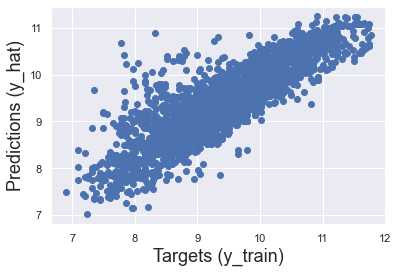

In [43]:
yhat = reg.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

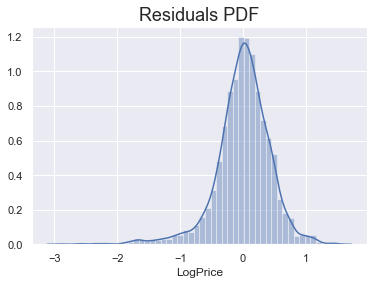

In [44]:
sn.distplot(y_train - yhat)
plt.title("Residuals PDF", size=18)

In [45]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [46]:
reg.score(x_train,y_train)


0.746130358668206

In [47]:
adj_r2(x_train,y_train)

0.7447263951344908

In [48]:
reg.intercept_

9.41597560260759

In [49]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448460
1,EngineV,0.213369
2,Brand_BMW,0.029416
3,Brand_Mercedes-Benz,0.019934
4,Brand_Mitsubishi,-0.133529
5,Brand_Renault,-0.174488
6,Brand_Toyota,-0.048438
7,Brand_Volkswagen,-0.078338
8,Body_hatch,-0.147505
9,Body_other,-0.100828


In [50]:
clean_data['Brand'].unique()
# => Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [51]:
clean_data['Body'].unique()
# => Cross over

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [52]:
clean_data['Engine Type'].unique()
# => Diesel 

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [53]:
yhat_test = reg.predict(x_test)

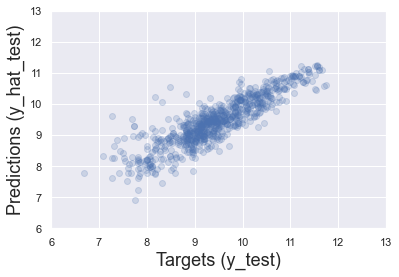

In [54]:
plt.scatter(y_test, yhat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [55]:
prediction = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
prediction['Targets'] = np.exp(y_test)
prediction.head(20)

,Prediction,Targets
0,11438.078110,7000.0
1,44760.715790,59999.0
2,3374.651604,2600.0
3,34764.872808,47600.0
4,2946.412895,3350.0
5,7008.385889,6999.0
6,8492.171266,7400.0
7,30531.298431,30500.0
8,11767.943356,8200.0
9,10900.548519,18999.0


In [56]:
prediction['Residual'] =np.absolute(prediction['Targets'] - prediction['Prediction'])
prediction['Difference%'] = prediction['Residual']/prediction['Targets']*100

In [57]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [58]:
prediction.head(30)


,Prediction,Targets,Residual,Difference%
0,11438.08,7000.00,4438.08,63.40
1,44760.72,59999.00,15238.28,25.40
2,3374.65,2600.00,774.65,29.79
3,34764.87,47600.00,12835.13,26.96
4,2946.41,3350.00,403.59,12.05
5,7008.39,6999.00,9.39,0.13
6,8492.17,7400.00,1092.17,14.76
7,30531.30,30500.00,31.30,0.10
8,11767.94,8200.00,3567.94,43.51
9,10900.55,18999.00,8098.45,42.63


In [59]:
prediction.describe()



,Prediction,Targets,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16873.85,19002.51,5586.48,38.05
std,14004.62,20144.36,8624.98,66.53
min,1003.52,800.00,2.11,0.01
25%,7595.65,7312.50,1180.72,12.68
50%,12315.57,11775.00,2808.14,24.18
75%,21591.34,22800.00,6110.37,41.63
max,77918.75,125000.00,84652.20,931.01
